# Softmax and Multiclassification with Torch


In [1]:
import torch
from sklearn.datasets import make_blobs
from torch.nn import Linear, ReLU, Sequential
from torch.utils.data import DataLoader, TensorDataset
from utils import plt_cat_mc, plt_mc

torch.set_default_dtype(torch.float64)

In [2]:
classes = 4
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(
    n_samples=2000, centers=centers, cluster_std=1.0, random_state=30
)

X_train, y_train = (
    torch.from_numpy(X_train),
    torch.from_numpy(y_train),
)

In [3]:
y_train

tensor([2, 0, 0,  ..., 1, 3, 2])

/home/al/projects/coursera/ml_spec_torch/c2_advanced_learning_algorithms/week2/utils.py:32: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  X[idx, 0],
/home/al/projects/coursera/ml_spec_torch/c2_advanced_learning_algorithms/week2/utils.py:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(


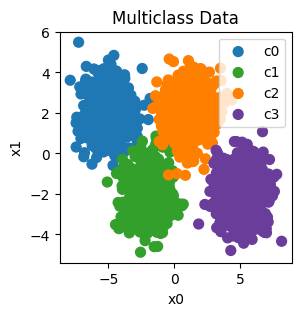

In [3]:
plt_mc(X_train, y_train, classes)

In [4]:
model = Sequential(Linear(2, 25), ReLU(), Linear(25, 15), ReLU(), Linear(15, 4))

cost_fun = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

epochs = 10
dataloader = DataLoader(TensorDataset(X_train, y_train), batch_size=32)

for epoch in range(epochs):
    print(f"epoch {epoch+1}/{epochs}")
    for i, (inputs, labels) in enumerate(dataloader):
        optimizer.zero_grad()

        output = model(inputs)

        loss = cost_fun(output, labels)

        loss.backward()

        optimizer.step()

    print("epoch {}, loss {}".format(epoch + 1, loss.item()))

epoch 1/10
epoch 1, loss 0.943551071276382
epoch 2/10
epoch 2, loss 0.5022975773166545
epoch 3/10
epoch 3, loss 0.2014551945256509
epoch 4/10
epoch 4, loss 0.09996562389963122
epoch 5/10
epoch 5, loss 0.06553487333549887
epoch 6/10
epoch 6, loss 0.05010518328025422
epoch 7/10
epoch 7, loss 0.041235131309381494
epoch 8/10
epoch 8, loss 0.03579676644415487
epoch 9/10
epoch 9, loss 0.0318710840189231
epoch 10/10
epoch 10, loss 0.02913464405520565


In [5]:
predictions = model(X_train)
print(f"two example output vectors:\n {predictions[:2]}")
print("largest value", torch.max(predictions), "smallest value", torch.min(predictions))

two example output vectors:
 tensor([[-2.1921, -3.9945,  3.0388, -0.4330],
        [ 5.5863,  0.6257, -2.2724, -5.2786]], grad_fn=<SliceBackward0>)
largest value tensor(11.9165, grad_fn=<MaxBackward1>) smallest value tensor(-12.2499, grad_fn=<MinBackward1>)


In [6]:
probabilities = torch.softmax(predictions, dim=1)
print(f"two example output vectors:\n {probabilities[:2]}")
print(
    "largest value",
    torch.max(probabilities),
    "smallest value",
    torch.min(probabilities),
)

two example output vectors:
 tensor([[5.1564e-03, 8.5028e-04, 9.6405e-01, 2.9944e-02],
        [9.9264e-01, 6.9571e-03, 3.8356e-04, 1.8978e-05]],
       grad_fn=<SliceBackward0>)
largest value tensor(1.0000, grad_fn=<MaxBackward1>) smallest value tensor(1.3239e-10, grad_fn=<MinBackward1>)


In [7]:
for i in range(5):
    print(f"{predictions[i]}, category: {torch.argmax(predictions[i])}")

tensor([-2.1921, -3.9945,  3.0388, -0.4330], grad_fn=<SelectBackward0>), category: 2
tensor([ 5.5863,  0.6257, -2.2724, -5.2786], grad_fn=<SelectBackward0>), category: 0
tensor([ 3.9733,  0.9216, -1.9882, -4.1016], grad_fn=<SelectBackward0>), category: 0
tensor([-1.0960,  3.6143, -3.3255, -0.9561], grad_fn=<SelectBackward0>), category: 1
tensor([ 0.1645, -6.7170,  5.4230, -4.4362], grad_fn=<SelectBackward0>), category: 2


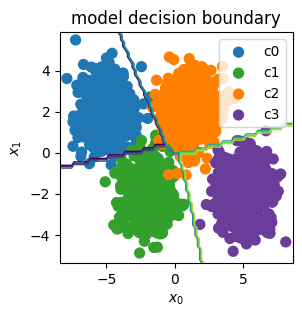

In [8]:
plt_cat_mc(X_train, y_train, model, classes)